In [1]:
import advent

data = advent.get_lines(9, map_fn = lambda x: [int(c) for c in x.split(',')])


In [2]:
def rectangle_area(x, y):
    return (abs(y[0] - x[0]) + 1) * (abs(y[1] - x[1]) + 1)

all_rectangles = [rectangle_area(data[i], data[j]) for i in range(len(data)) for j in range(i)]

print(max(all_rectangles))

4755429952


In [3]:
# Part 2 todo
# First, get a set of all the edge points
from tqdm import tqdm
from functools import cache
from collections import defaultdict

edges = set()

for i in range(len(data)):
    j = (i + 1) % len(data)
    if data[i][0] == data[j][0]:  # vertical line
        # Gonna be honest, the next 7 lines were generated by copilot. But thank god because that would be painful to write myself
        x = data[i][0]
        for y in range(min(data[i][1], data[j][1]), max(data[i][1], data[j][1]) + 1):
            edges.add((x, y))
    elif data[i][1] == data[j][1]:  # horizontal line
        y = data[i][1]
        for x in range(min(data[i][0], data[j][0]), max(data[i][0], data[j][0]) + 1):
            edges.add((x, y))
    else:
        raise ValueError("Diagonal line not allowed")

def crosses_edge(p1, p2, q1, q2):
    if p1[0] == p2[0]:  # vertical line
        if q1[0] == q2[0]: return False  # parallel
        return (min(q1[0], q2[0]) <= p1[0] <= max(q1[0], q2[0]) and
                min(p1[1], p2[1]) <= q1[1] <= max(p1[1], p2[1]))
    elif p1[1] == p2[1]:  # horizontal line
        if q1[1] == q2[1]: return False  # parallel
        return (min(q1[1], q2[1]) <= p1[1] <= max(q1[1], q2[1]) and
                min(p1[0], p2[0]) <= q1[0] <= max(p1[0], p2[0]))

def validate_point(x, y):
    # Check if point is on an edge
    if (x, y) in edges:
        return True
    # Check if point is inside the polygon using ray-casting algorithm
    crossings = 0
    for i in range(len(data)):
        j = (i + 1) % len(data)
        if crosses_edge((0, y + 0.5), (x + 0.5, y + 0.5), data[i], data[j]):
            crossings += 1
    return crossings % 2 == 1

def validate_line(x, y):
    # More copilot magic :D
    if x[0] == y[0]:  # vertical line
        x_coord = x[0]
        for y_coord in range(min(x[1], y[1]), max(x[1], y[1]) + 1):
            if not validate_point(x_coord, y_coord): return False
    elif x[1] == y[1]:  # horizontal line
        y_coord = x[1]
        for x_coord in range(min(x[0], y[0]), max(x[0], y[0]) + 1):
            if not validate_point(x_coord, y_coord): return False
    else:
        raise ValueError("Diagonal line not allowed")
    return True

def validate_rectangle(x, y):
    return (validate_line((x[0], x[1]), (y[0], x[1])) and
            validate_line((y[0], x[1]), (y[0], y[1])) and
            validate_line((y[0], y[1]), (x[0], y[1])) and
            validate_line((x[0], y[1]), (x[0], x[1])))

# Unfortunately this approach didn't work, too slow
# valid_rectangles = [rectangle_area(data[i], data[j]) for i in tqdm(range(len(data))) for j in range(i) if validate_rectangle(data[i], data[j])]
# print(max(valid_rectangles))
    

In [4]:
def clamp(val, cr):
    return max(cr[0], min(cr[1], val))

def crosses_edge_2(p1, p2, q1, q2):
    if p1[0] == p2[0]:  # vertical line
        if q1[0] == q2[0]: return False  # parallel
        return (min(q1[0], q2[0]) < p1[0] < max(q1[0], q2[0]) and
                min(p1[1], p2[1]) < q1[1] < max(p1[1], p2[1]))
    elif p1[1] == p2[1]:  # horizontal line
        if q1[1] == q2[1]: return False  # parallel
        return (min(q1[1], q2[1]) < p1[1] < max(q1[1], q2[1]) and
                min(p1[0], p2[0]) < q1[0] < max(p1[0], p2[0]))
    

def validate_line_2(x, y):
    # Try to find all relevant edges. This can either be parallel or perpendicular
    # parallel edges are 'inside' by definition so we can just ignore them
    # perpendicular edges we just brute force the points left/right of them
    #if x[0] == y[0]: cr = min(x[1], y[1]), max(x[1], y[1])
    #else: cr = min(x[0], y[0]), max(x[0], y[0])
    print(f"Validating line {x} to {y}")
    for i in range(len(data)):
        j = (i + 1) % len(data)
        if crosses_edge_2(x, y, data[i], data[j]): return False
    return True

def validate_rectangle_2(x, y):
    return (validate_line_2((x[0], x[1]), (y[0], x[1])) and
            validate_line_2((y[0], x[1]), (y[0], y[1])) and
            validate_line_2((y[0], y[1]), (x[0], y[1])) and
            validate_line_2((x[0], y[1]), (x[0], x[1])))

#valid_rectangles = [(rectangle_area(data[i], data[j]), i, j) for i in tqdm(range(len(data))) for j in range(i) if validate_rectangle_2(data[i], data[j])]
#print(max(valid_rectangles))


In [ ]:
!uv pip install shapely

In [11]:
from shapely import Polygon

shape = Polygon(data + [data[0]])

def validate_rectangle_3(x, y):
    small_shape = Polygon([(x[0], x[1]), (y[0], x[1]), (y[0], y[1]), (x[0], y[1]), (x[0], x[1])])
    return shape.contains(small_shape)

valid_rectangles = [(rectangle_area(data[i], data[j]), i, j) for i in range(len(data)) for j in range(i) if validate_rectangle_3(data[i], data[j])]
print(max(valid_rectangles))

(1429596008, 248, 220)


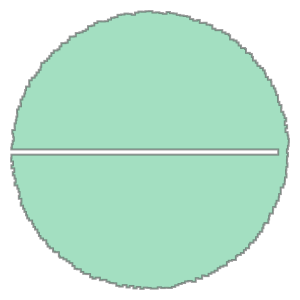

In [12]:
shape